# British Airways Webscrapping Task 1

In [2]:
#import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Webscrapping using bs4

In [3]:
#This is the root URL of the British Airways reviews page.
base_url = "https://www.airlinequality.com/airline-reviews/british-airways" 

# This variable is set to 10, which means the script will scrape data from 10 pages.
pages = 10

# The script is configured to retrieve 100 reviews per page.
page_size = 300

# An empty list called reviews is created, which will store all the reviews scraped from the website.
reviews = [] 

# A loop is used to iterate through the pages. The range starts at 1 and goes up to 10
# for i in range(1, pages + 1):
for i in range(1, pages + 1):
    
    # This is just a print statement to show which page of reviews is being scraped.
    print(f"Scraping page {i}")
    
    # For each iteration (page), the script dynamically constructs the URL for that page. 
    # The {i} in the URL corresponds to the page number.
    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    
    # This sends an HTTP GET request to the constructed URL to fetch the HTML content of the page
    # Collect HTML data from this page
    response = requests.get(url) 
    
    # The script looks for all <div> elements with the class text_content.
    # Each of these <div> elements contains a review.
    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())     
    
    # After each page is scraped, the script prints the total number of reviews
    # collected so far by checking the length of the reviews list.
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 300 total reviews
Scraping page 2
   ---> 600 total reviews
Scraping page 3
   ---> 900 total reviews
Scraping page 4
   ---> 1200 total reviews
Scraping page 5
   ---> 1500 total reviews
Scraping page 6
   ---> 1800 total reviews
Scraping page 7
   ---> 2100 total reviews
Scraping page 8
   ---> 2400 total reviews
Scraping page 9
   ---> 2700 total reviews
Scraping page 10
   ---> 3000 total reviews


# Stores the scrapped data in a DataFrame

In [4]:
# This initializes an empty DataFrame using the pandas.DataFrame() constructor.
# The DataFrame is like a table, and it will be used to store the scraped reviews.
df = pd.DataFrame()

# Here, the reviews list (which contains all the scraped review texts) is assigned
# to a new column in the DataFrame called "reviews".
df["reviews"] = reviews 

df.head()

,reviews
0,Not Verified | LHR T5 BA Gold Wing worked wel...
1,Not Verified | Very good service on this rout...
2,✅ Trip Verified | Flight mainly let down by ...
3,✅ Trip Verified | Another awful experience b...
4,"✅ Trip Verified | The service was rude, full..."


# Remove unnecessary words from the reviews to make the data clean

In [5]:
# Define a function to clean reviews
def clean_review(review):
    
    # Check and remove "Not Verified", "✅ Trip Verified", or "Verified" from the start
    if review.startswith("Not Verified"):
        return review.replace("Not Verified |", "").strip()
    elif review.startswith("✅ Trip Verified"):
        return review.replace("✅ Trip Verified |", "").strip()
    elif review.startswith("Verified"):
        return review.replace("Verified |", "").strip()
    return review

# Apply the function to each review in the DataFrame
df['cleaned_reviews'] = df['reviews'].apply(clean_review)

# Display the cleaned reviews
print(df[['reviews', 'cleaned_reviews']])

                                                reviews  \
0     Not Verified |  LHR T5 BA Gold Wing worked wel...   
1     Not Verified |  Very good service on this rout...   
2     ✅ Trip Verified |   Flight mainly let down by ...   
3     ✅ Trip Verified |   Another awful experience b...   
4     ✅ Trip Verified |   The service was rude, full...   
...                                                 ...   
2995  Slight delay. Games advertised on website, not...   
2996  A slight delay in boarding (BA 816 - scheduled...   
2997  Check in agent at Glasgow was very cheerful an...   
2998  Flew from Gatwick on 09/08/15 to Genoa to join...   
2999  This was my first flight on a British Airways ...   

                                        cleaned_reviews  
0     LHR T5 BA Gold Wing worked well. Pleasant chec...  
1     Very good service on this route BA2710 30th Ma...  
2     Flight mainly let down by a disagreeable fligh...  
3     Another awful experience by British Airways. T...  
4

# Save cleaned data to csv file

In [7]:
import os

# Apply the cleaning function to the DataFrame
df['cleaned_reviews'] = df['reviews'].apply(clean_review)

# Ensure the 'data' directory exists (creates it if it doesn't)
os.makedirs('data', exist_ok=True)

# Save the cleaned DataFrame to a CSV file
df.to_csv("data/BA_reviews.csv", index=False)

print("Cleaned reviews saved successfully.")


Cleaned reviews saved successfully.


In [17]:
pip install textblob

# Basic Sentiment Analysis
## Goal: Identify the general sentiment (positive, negative, or neutral) of the reviews.

In [8]:
from textblob import TextBlob

# Function to get sentiment polarity
def get_sentiment(review):
    blob = TextBlob(review)
    return blob.sentiment.polarity

# Apply sentiment analysis to each review
df['sentiment'] = df['cleaned_reviews'].apply(get_sentiment)

# Classify as Positive, Negative, or Neutral
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

print(df[['cleaned_reviews', 'sentiment_label']].head())


                                     cleaned_reviews sentiment_label
0  LHR T5 BA Gold Wing worked well. Pleasant chec...        Positive
1  Very good service on this route BA2710 30th Ma...        Negative
2  Flight mainly let down by a disagreeable fligh...        Positive
3  Another awful experience by British Airways. T...        Negative
4  The service was rude, full of attitude to me, ...        Negative


# Sentiment Distribution Analysis (Visualization)
## Goal: Show how many reviews are Positive, Negative, or Neutral using a bar chart or pie chart.

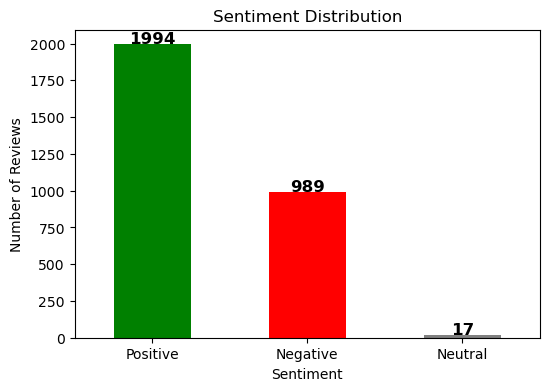

In [12]:
import matplotlib.pyplot as plt

# Count the number of reviews for each sentiment
sentiment_counts = df['sentiment_label'].value_counts()

# Create a bar chart
plt.figure(figsize=(6,4))
bars = sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])

# Add text labels on bars
for i, count in enumerate(sentiment_counts):
    plt.text(i, count + 5, str(count), ha='center', fontsize=12, fontweight='bold')

# Labels and title
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.title("Sentiment Distribution")
plt.xticks(rotation=0)  # Keep labels straight

# Show the plot
plt.show()



In [10]:
pip install wordcloud


     ------------------------------------ 299.8/299.8 kB 617.3 kB/s eta 0:00:00


# Generate word cloud

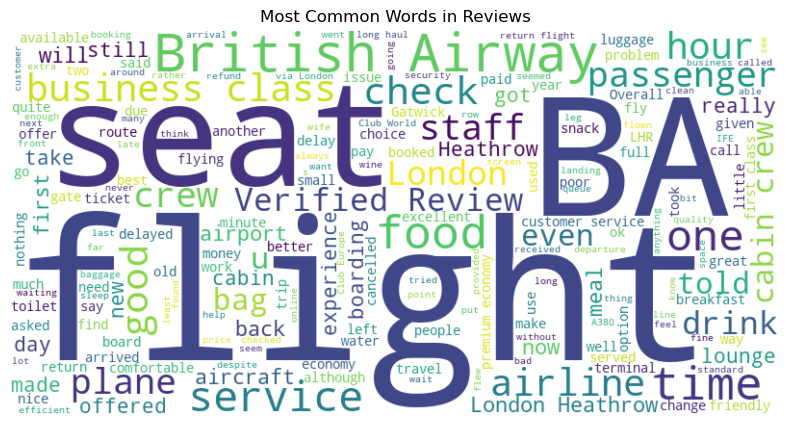

In [11]:
from wordcloud import WordCloud

text = " ".join(df['cleaned_reviews'])  # Combine all reviews
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Reviews")
plt.show()


# Sentiment by Business Class vs Economy
## Are business class reviews better than economy class?

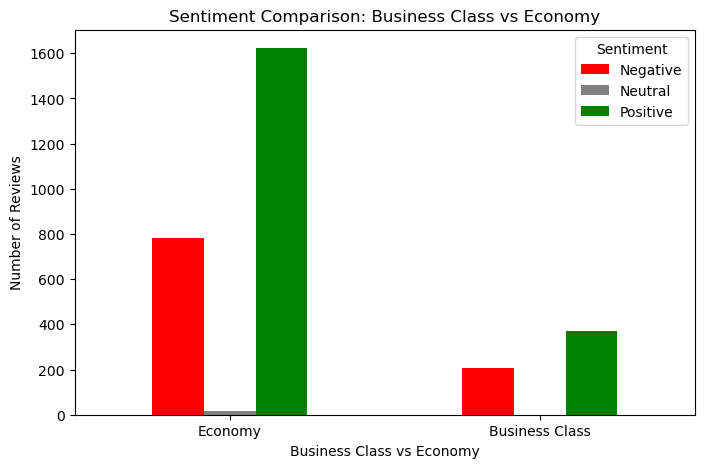

In [14]:
df['is_business_class'] = df['cleaned_reviews'].apply(lambda x: 'business class' in x.lower())

# Count sentiment for Business Class vs Economy
sentiment_by_class = df.groupby('is_business_class')['sentiment_label'].value_counts().unstack()

# Plot results
sentiment_by_class.plot(kind='bar', figsize=(8,5), color=['red', 'gray', 'green'])
plt.xlabel("Business Class vs Economy")
plt.ylabel("Number of Reviews")
plt.title("Sentiment Comparison: Business Class vs Economy")
plt.xticks(ticks=[0,1], labels=["Economy", "Business Class"], rotation=0)
plt.legend(title="Sentiment")
plt.show()
